In [1]:
import networkx as nx
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import json
import random

In [2]:
cities = {}
with open('yelp/yelp_academic_dataset_business.json', encoding="utf8") as f:
    for line in f:
        business = json.loads(line)
        if business['city'] not in cities:
            cities[business['city']] = 1
        else:
            cities[business['city']] += 1

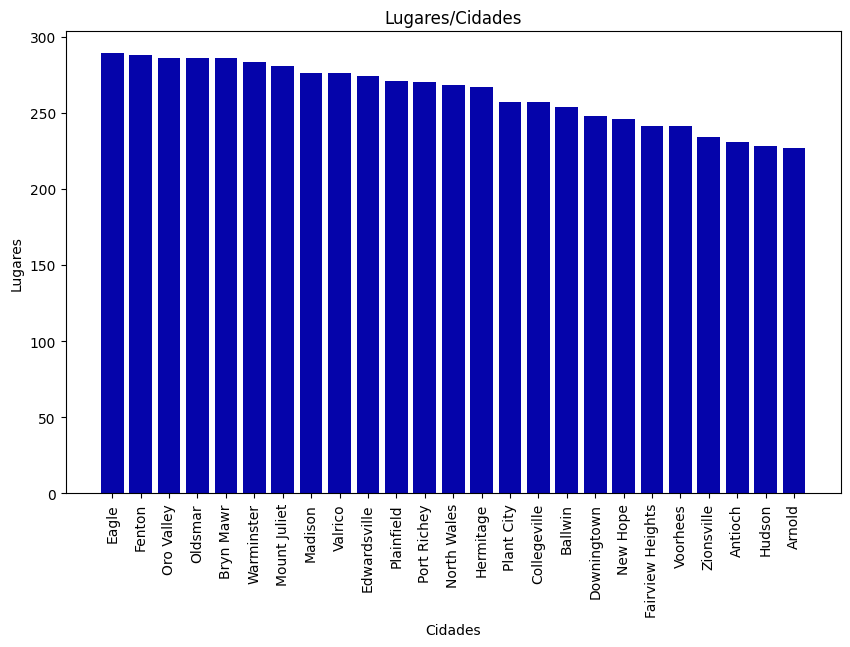

In [3]:
T = 75
N = 100
plt.figure(figsize=(10,6))
big_cities = dict(sorted(cities.items(), key=itemgetter(1), reverse=True)[T:N])
plt.bar(list(big_cities.keys()), big_cities.values(), color='#0504aa')
plt.xlabel('Cidades')
plt.ylabel('Lugares')
plt.title('Lugares/Cidades')
plt.xticks(rotation = 90)
plt.show()

In [4]:
select_city = "Arnold"
business_ids = set()
with open('yelp/yelp_academic_dataset_business.json', encoding="utf8") as f:
    for line in f:
        business = json.loads(line)
        if business['city'] == select_city:
            business_ids.add(business['business_id'])
print("Número de lugares: {}".format(len(business_ids)))

Número de lugares: 227


In [5]:
user_ids = []
review_counter = 0
with open("./yelp/yelp_academic_dataset_review.json", encoding="utf8") as f:
    for line in f:
        review = json.loads(line)
        if review['business_id'] in business_ids: 
            if review['user_id'] not in user_ids:
                user_ids.append(review['user_id'])
            review_counter += 1
print("Número de reviews: {}".format(review_counter))
print("Número de usuários: {}".format(len(user_ids)))

Número de reviews: 4575
Número de usuários: 2901


In [6]:
users = []
with open('yelp/yelp_academic_dataset_user.json', encoding="utf8") as f:
    for line in f:
        user = json.loads(line)
        if user['user_id'] in user_ids:
            users.append(user)
G = nx.Graph()
for user in user_ids:
    G.add_node(user)
for user in users:
    for friend in user['friends'].split(', '):
        if friend in G.nodes():
            G.add_edge(user['user_id'], friend)
print("Número de usuários: {}".format(len(G.nodes())))
print("Número de amizades: {}".format(len(G.edges())))
print("Número de médio de amigos: {}".format(len(G.edges()) / len(G.nodes())))

Número de usuários: 2901
Número de amizades: 1690
Número de médio de amigos: 0.5825577387107894


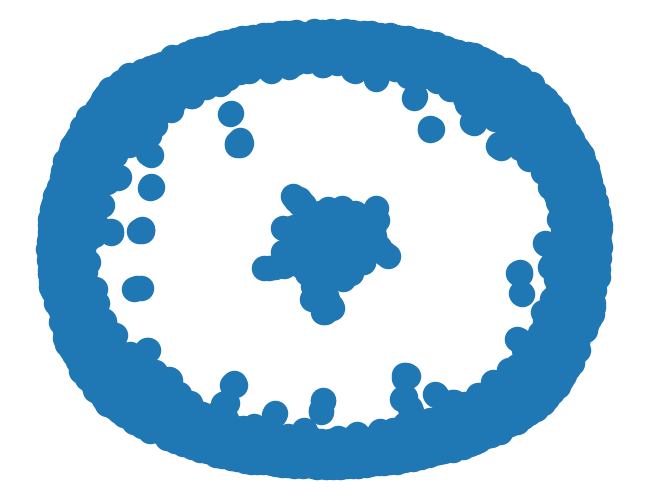

In [7]:
nx.draw(G, pos=nx.spring_layout(G))

In [8]:
degree_g = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict({
'node': list(degree_g.keys()),
'centrality': list(degree_g.values())
})
degree_df = degree_df.sort_values('centrality', ascending=False).head(50)
degree_df

,node,centrality
1372,C3Hpsx_eDfeSmxEc1HBzpA,0.056897
1936,lMY8NBPyzlPbbu-KBYfD9A,0.032759
2511,5l3vzl3snZzbM3w9hWKRDA,0.024483
1004,mKBl4fAqTfNts7B78aOPVg,0.018966
1995,xdQzGzNu3nIUEvOGPW1tYw,0.017931
1603,F3lu1icxJX5A5tCw-jVpTg,0.016552
825,60RKNAZwY5EUooJf624aKw,0.015517
887,2mehWDiaP-8CcZRtLGlYIA,0.015517
1154,BnBQ0UU9uSiI_0cbCZ4lsw,0.013448
416,HmreZAKDF0mci7WwpER_lA,0.012759


In [9]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print("Número de usuários: {}".format(len(Gcc.nodes())))
print("Número de amizades: {}".format(len(Gcc.edges())))
print("Número de médio de amigos: {}".format(len(Gcc.edges()) / len(Gcc.nodes())))

Número de usuários: 626
Número de amizades: 1611
Número de médio de amigos: 2.573482428115016


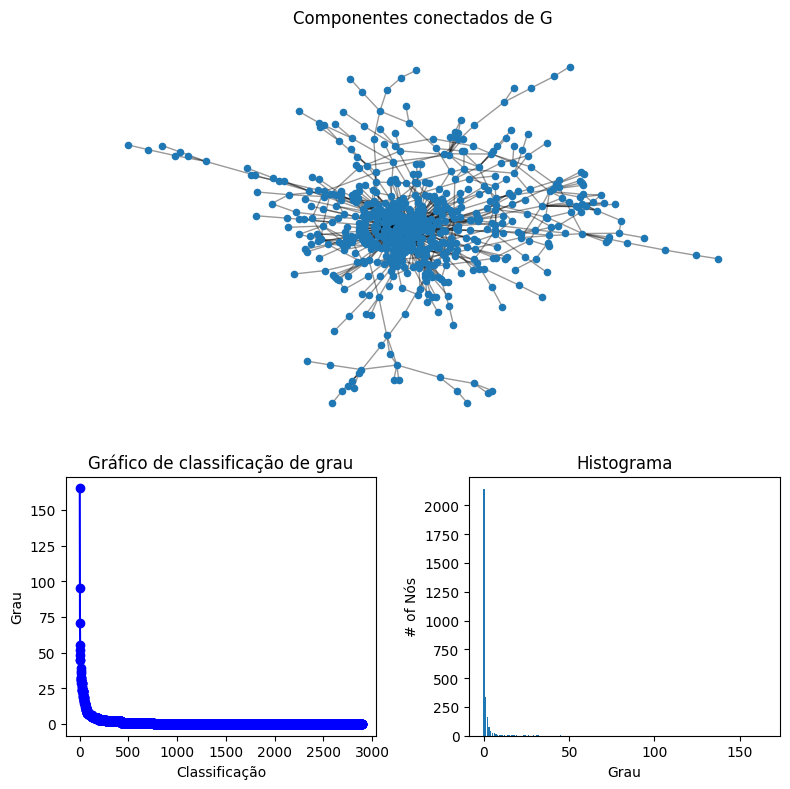

In [11]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Grau da rede de usuários", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Componentes conectados de G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Gráfico de classificação de grau")
ax1.set_ylabel("Grau")
ax1.set_xlabel("Classificação")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Histograma")
ax2.set_xlabel("Grau")
ax2.set_ylabel("# of Nós")

fig.tight_layout()
plt.show()

In [12]:
with open('selected-users.txt', "w") as f:
    for user in user_ids:
        f.write(user)
        f.write("\n")

In [13]:
nx.write_gml(G, "users-friends.gml")

## Caracteristicas

Rede Subcritica 